In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

    


file_path = 'AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2021_Datensatz.csv'
df = pd.read_csv(file_path, sep=';')

df.head()



OBJECTID  LAND  BEZ  LOR_ab_2021  UJAHR  UMONAT  USTUNDE  UWOCHENTAG  \
0    219249    11    3    3701658.0   2021      11       18           2   
1    219248    11    7    7501134.0   2021      12       19           7   
2    219247    11    4    4100101.0   2021      12       17           4   
3    219246    11    4    4501041.0   2021      12       15           7   
4    219243    11   11   11501339.0   2021      12        9           5   

   UKATEGORIE  UART  ...  IstPKW  IstFuss  IstKrad  IstGkfz  IstSonstige  \
0           3     0  ...       1        0        1        0            0   
1           3     6  ...       1        1        0        0            0   
2           3     5  ...       1        0        0        0            0   
3           3     5  ...       1        0        1        0            0   
4           3     3  ...       1        0        0        0            1   

   USTRZUSTAND      LINREFX      LINREFY    XGCSWGS84    YGCSWGS84  
0            1  800202,0742  5829640,204  13,42689483  52,53393955  
1            1  798479,5317  5819049,219  13,39209027  52,43995086  
2            0  793352,6128  5829680,195  13,32624193  52,53802784  
3            1  792950,0395  5825362,081  13,31652064  52,49953417  
4            2    807182,01  5825602,793  13,52575163  52,49386714  

[5 rows x 23 columns]

In [2]:
df.describe()

OBJECTID     LAND           BEZ   LOR_ab_2021    UJAHR  \
count   11267.000000  11267.0  11267.000000  1.126600e+04  11267.0   
mean   200048.203870     11.0      5.541227  5.823506e+06   2021.0   
std     34841.735786      0.0      3.478722  3.477900e+06      0.0   
min    109753.000000     11.0      1.000000  1.100101e+06   2021.0   
25%    210441.500000     11.0      2.000000  2.500835e+06   2021.0   
50%    213258.000000     11.0      5.000000  5.200420e+06   2021.0   
75%    216074.500000     11.0      8.000000  8.200832e+06   2021.0   
max    219249.000000     11.0     12.000000  1.260124e+07   2021.0   

             UMONAT       USTUNDE    UWOCHENTAG    UKATEGORIE          UART  \
count  11267.000000  11267.000000  11267.000000  11267.000000  11267.000000   
mean       7.149996     13.605751      4.069761      2.847697      3.515488   
std        3.047300      4.724270      1.808249      0.366908      2.188767   
min        1.000000      0.000000      1.000000      1.000000      0.000000   
25%        5.000000     10.000000      3.000000      3.000000      2.000000   
50%        7.000000     14.000000      4.000000      3.000000      5.000000   
75%       10.000000     17.000000      6.000000      3.000000      5.000000   
max       12.000000     23.000000      7.000000      3.000000      9.000000   

              UTYP1    ULICHTVERH        IstRad        IstPKW       IstFuss  \
count  11267.000000  11267.000000  11267.000000  11267.000000  11267.000000   
mean       3.880447      0.435697      0.377297      0.802166      0.129582   
std        1.938610      0.788147      0.484732      0.398384      0.335858   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      1.000000      0.000000   
50%        3.000000      0.000000      0.000000      1.000000      0.000000   
75%        6.000000      0.000000      1.000000      1.000000      0.000000   
max        7.000000      2.000000      1.000000      1.000000      1.000000   

            IstKrad       IstGkfz   IstSonstige   USTRZUSTAND  
count  11267.000000  11267.000000  11267.000000  11267.000000  
mean       0.146978      0.030354      0.164019      0.268572  
std        0.354100      0.171567      0.370309      0.475319  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000      2.000000

In [3]:
#Klassifikation: UWOCHENTAG=Samstag, ULICHTVERH nacht, USTRZUSTAND=1, wie wahrscheinlich welche Unfallart?

In [4]:
y=df['UART']
X=df[['UMONAT','USTUNDE','UWOCHENTAG','UKATEGORIE','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige']] 

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logR = LogisticRegression(max_iter = 1000)
logR.fit(X_train, y_train)

y_pred = logR.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logR.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


/Users/cindystammberger/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Decision Tree classifier on test set: 0.68


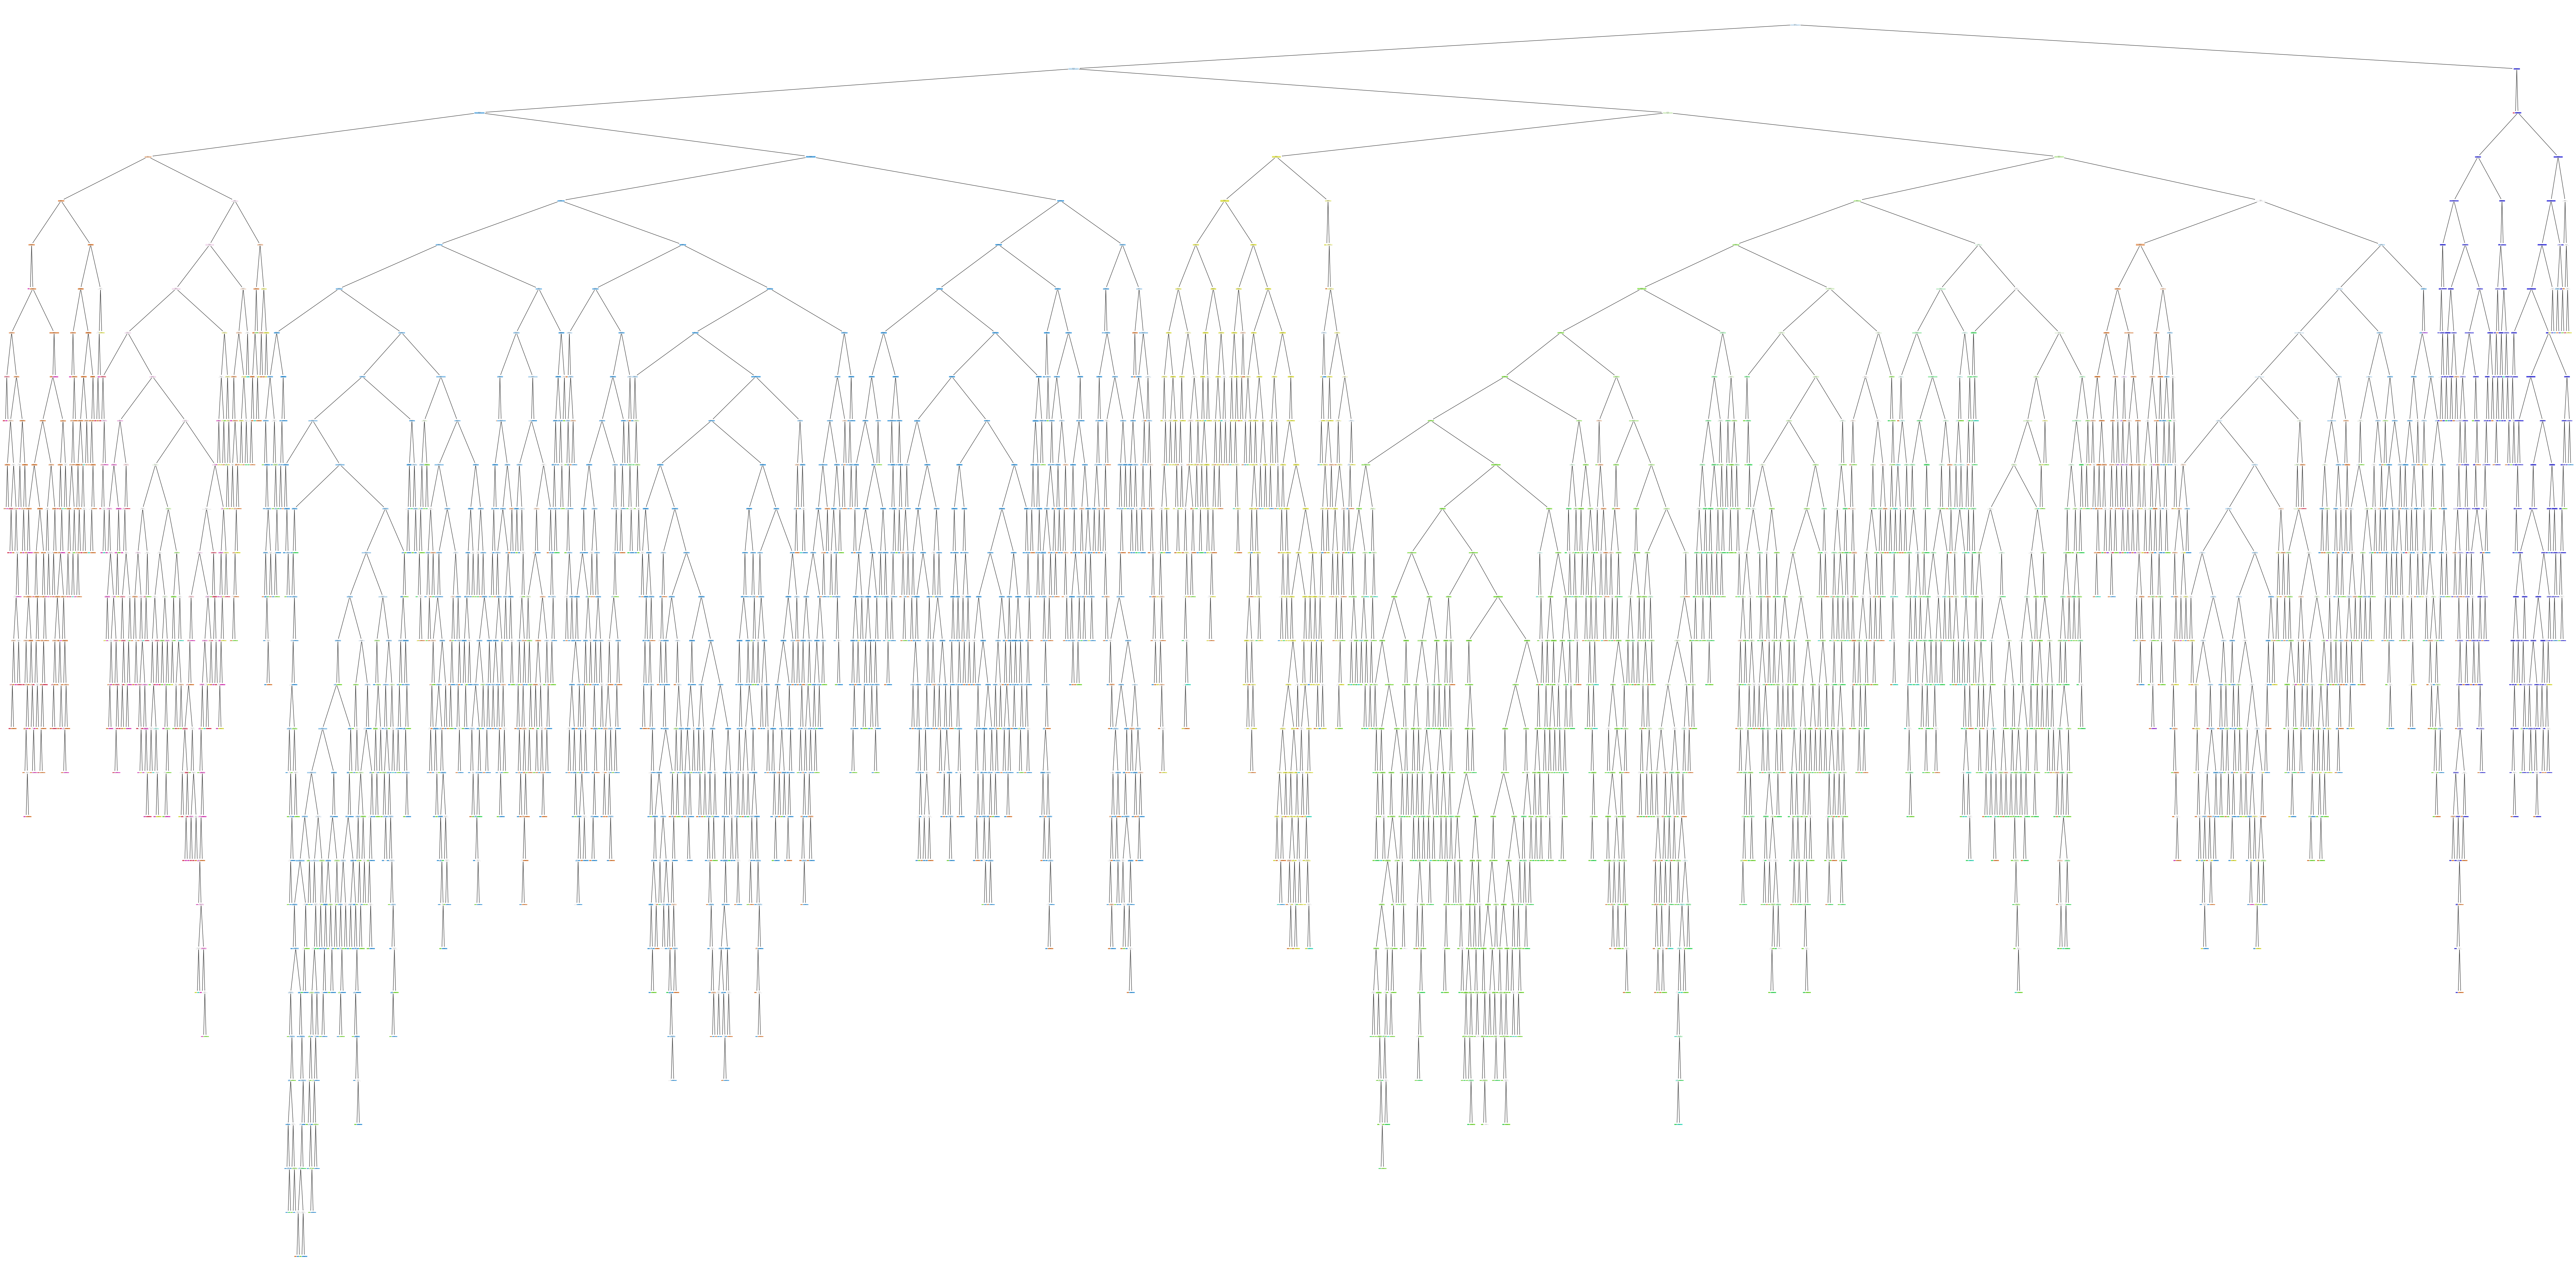

In [6]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

plt.figure(figsize=(120,60))

plot_tree(clf,filled=True, feature_names=X.columns)
plt.show()
